Here we will take a look how to eigenvalues of the Kernel change with different architectures of the NN, while keeping the same amount of total amount of parameters roughly the same

In [8]:
# Files and setup
using Flux, LinearAlgebra, Random, CairoMakie
include("DenseNTK.jl")
include("normNTK.jl")

Nθ(model) = sum(length, Flux.params(model)); # Calculate notal amount of params
eig(K) = abs.(eigen(K).values); # get eigen_values of Kernel

In [9]:
# Fake data
Nx=21
a=-1.0; b=1.0

xVec=collect(range(a,stop=b,length=Nx));
yVec=sin.(2*pi*xVec) .+ 0.1*randn(size(xVec)); 

In [10]:
# Find Nh for number of hidden layers
quad_solve(a,b) = (-b+sqrt(b^2 - (4*a*-30000)))/(2*a)
req_Nh(Lh) = quad_solve(Lh-1, Lh+2)
req_Nh(20)

39.16124070959959

In [11]:
Nh = 10000

Nh1 = Nh
m_Lh_1 = Chain(DenseNTK(1,Nh, relu), DenseNTK(Nh,1))

Nh2 = 171 # found via quadratic equation
m_Lh_2 = Chain(DenseNTK(1,Nh2,relu), DenseNTK(Nh2,Nh2,relu), DenseNTK(Nh2,1))

Nh5 = 85 # found via quadratic equation
m_Lh_5 = Chain(DenseNTK(1,Nh5,relu), DenseNTK(Nh5,Nh5,relu),  DenseNTK(Nh5,Nh5,relu),  DenseNTK(Nh5,Nh5,relu),  DenseNTK(Nh5,Nh5,relu), DenseNTK(Nh5,1))

LhExtra = 20
NhExtra = Int(round(req_Nh(LhExtra)))

# m_Lh_Extra = Chain(DenseNTK(1, NhExtra, relu))
# for i in 2:LhExtra
#     m_Lh_Extra = Chain(m_Lh_Extra, DenseNTK(NhExtra, NhExtra, relu))
# end
# m_Lh_Extra = Chain(m_Lh_Extra, DenseNTK(NhExtra, 1))


display(Nθ(m_Lh_1))
display(Nθ(m_Lh_2))
display(Nθ(m_Lh_5))
#display(Nθ(m_Lh_Extra))

30001

29926

29496

Eigenvalue review

In [12]:
K1 = kernel(m_Lh_1, hcat(xVec...),true);
K2 = kernel(m_Lh_2, hcat(xVec...),true);
K5 = kernel(m_Lh_5, hcat(xVec...),true);
#KExtra = kernel(m_Lh_Extra, hcat(xVec...),true);

Computing kernel: 100%|██████████████████████████████████████████████████| Time: 0:00:07
Computing kernel: 100%|██████████████████████████████████████████████████| Time: 0:00:08
Computing kernel: 100%|██████████████████████████████████████████████████| Time: 0:00:10


21×21 Matrix{Float64}:
 3.41949  3.3837   3.36623  3.34372  …  3.14453  3.13988  3.09492  3.08357
 3.3837   3.40055  3.37755  3.35741     3.16062  3.15513  3.10992  3.09783
 3.36623  3.37755  3.4132   3.39558     3.19955  3.18536  3.13796  3.12046
 3.34372  3.35741  3.39558  3.40459     3.21003  3.19554  3.14725  3.12669
 3.32041  3.33544  3.37703  3.38807     3.2139   3.19992  3.1518   3.12492
 3.28544  3.29898  3.34123  3.3532   …  3.21303  3.19839  3.14834  3.12083
 3.27976  3.29578  3.33686  3.3455      3.36513  3.36469  3.31573  3.28946
 3.23516  3.2473   3.28747  3.2987      3.32737  3.32516  3.27615  3.24691
 3.20716  3.21748  3.25726  3.27096     3.31701  3.316    3.26744  3.23939
 3.1888   3.19945  3.24124  3.25386     3.35274  3.35123  3.30575  3.2765
 ⋮                                   ⋱                             ⋮
 3.13696  3.14869  3.18881  3.20105     3.36963  3.36761  3.32415  3.29431
 3.13572  3.14821  3.19591  3.20849     3.39877  3.37922  3.33637  3.30642
 3.12886 

In [13]:
eig1 = eig(K1)
eig2 = eig(K2)
eig5 = eig(K5)
#eigExtra = eig(KExtra);

21-element Vector{Float64}:
  0.0015333481862355339
  0.0024178338752837147
  0.0025316371717618875
  0.003509266141854336
  0.00575721770706737
  0.007287673293089896
  0.008179305737159966
  0.009385589436332439
  0.010886456253794025
  0.013977841511552756
  ⋮
  0.025453096704354097
  0.027085040034108138
  0.04084826388500716
  0.07831617913734515
  0.13261998185962748
  0.17411860023722883
  0.5164479492969983
  1.5882560178148493
 69.41967502990332

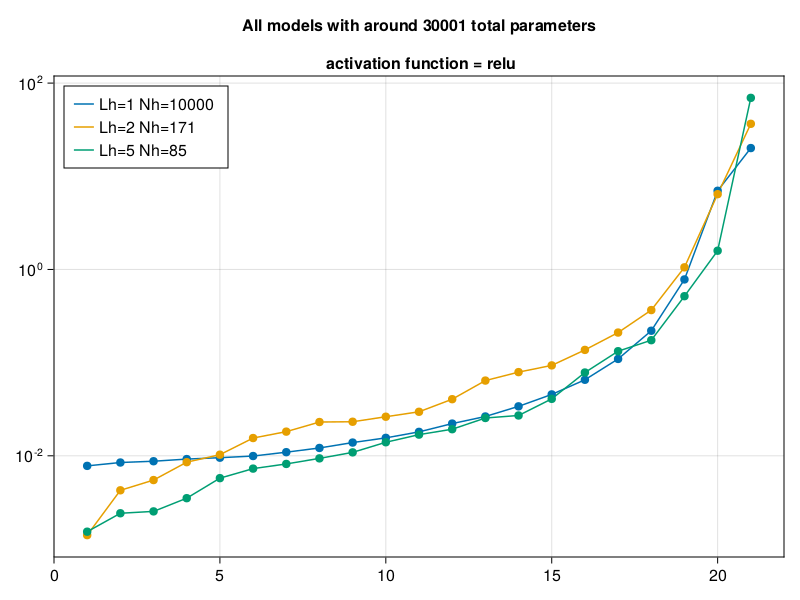

In [15]:
N = Nθ(m_Lh_1)


fig = Figure()
ax1 = Axis(fig[1,1], yscale=log10, title="All models with around $N total parameters\n\n activation function = relu")
CairoMakie.lines!(eig1, label="Lh=1 Nh=$Nh1 ")
CairoMakie.lines!(eig2, label="Lh=2 Nh=$Nh2")
CairoMakie.lines!(eig5, label="Lh=5 Nh=$Nh5")
#CairoMakie.lines!(eigExtra, label="Lh=$LhExtra Nh=$NhExtra")

CairoMakie.scatter!(eig1)
CairoMakie.scatter!(eig2)
CairoMakie.scatter!(eig5)
#CairoMakie.scatter!(eigExtra)

axislegend(ax1,position=:lt)
fig

<h1>Lets check for more datapoints and one hidden layers</h1>

In [16]:

Nh1 = 100
Nh2 = Nh1*10
Nh3 = Nh2*10
Nh4 = Nh3*10
Nh5 = Nh4*10

m_Nh1 = Chain(DenseNTK(1,Nh1, relu), DenseNTK(Nh1, 1))
m_Nh2 = Chain(DenseNTK(1,Nh2, relu), DenseNTK(Nh2, 1))
m_Nh3 = Chain(DenseNTK(1,Nh3, relu), DenseNTK(Nh3, 1))
m_Nh4 = Chain(DenseNTK(1,Nh4, relu), DenseNTK(Nh4, 1))
m_Nh5 = Chain(DenseNTK(1,Nh5, relu), DenseNTK(Nh5, 1));

In [87]:
# Fake data
Nx=21
a=-1.0; b=1.0

xVec=collect(range(a,stop=b,length=Nx));
yVec=sin.(2*pi*xVec) .+ 0.1*randn(size(xVec)); 

In [88]:
K_Nh1 = kernel(m_Nh1, hcat(xVec...), true)
K_Nh2 = kernel(m_Nh2, hcat(xVec...), true)
K_Nh3 = kernel(m_Nh3, hcat(xVec...), true)

Computing kernel: 100%|██████████████████████████████████████████████████| Time: 0:00:08


21×21 Matrix{Float64}:
 1.98903   1.87285   1.76278   1.64222   …  0.401083  0.363048  0.328335
 1.87285   1.80713   1.70623   1.5951       0.434567  0.39839   0.36523
 1.76278   1.70623   1.6438    1.54264      0.470861  0.437086  0.406021
 1.64222   1.5951    1.54264   1.4897       0.511172  0.4801    0.45143
 1.53189   1.49353   1.45038   1.40704      0.557584  0.529406  0.503325
 1.41953   1.38974   1.35569   1.32177   …  0.609715  0.584798  0.56167
 1.30724   1.28565   1.26036   1.23548      0.662672  0.64175   0.622312
 1.20433   1.1903    1.17311   1.15663      0.72098   0.704371  0.688939
 1.10304   1.09611   1.08657   1.07804      0.784049  0.772165  0.761152
 1.00496   1.00458   1.00213   1.001        0.854005  0.847343  0.841245
 ⋮                                       ⋱                      ⋮
 0.745384  0.761006  0.77618   0.793573     1.10442   1.11733   1.12989
 0.670967  0.690716  0.710561  0.732924     1.19298   1.2137    1.23375
 0.605213  0.628593  0.652612  0.679448 

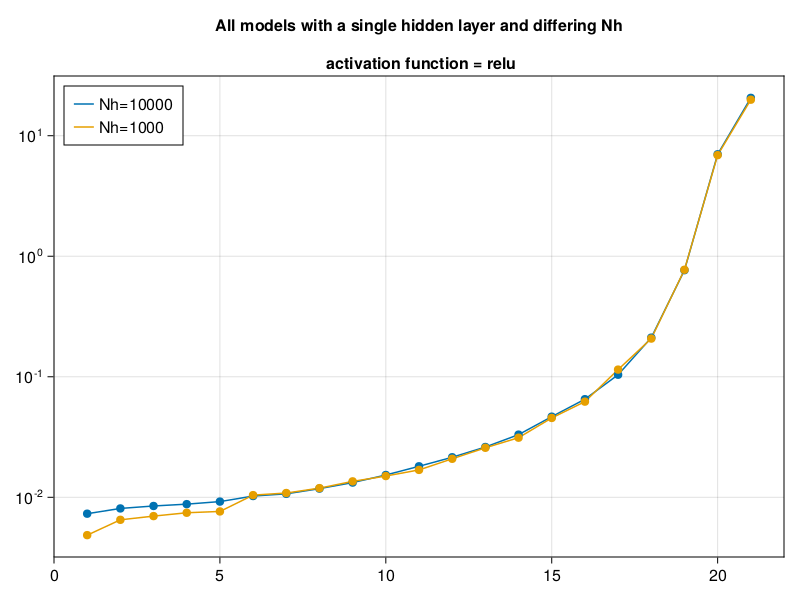

In [91]:
fig = Figure()
ax1 = Axis(fig[1,1], yscale=log10, title="All models with a single hidden layer and differing Nh\n\n activation function = relu")
CairoMakie.lines!(eig(K_Nh3), label="Nh=$Nh3")
CairoMakie.lines!(eig(K_Nh2), label="Nh=$Nh2")
#CairoMakie.lines!(eig(K_Nh1), label="Nh=$Nh1")


CairoMakie.scatter!(eig(K_Nh3))
CairoMakie.scatter!(eig(K_Nh2))
#CairoMakie.scatter!(eig(K_Nh1))



axislegend(ax1,position=:lt)
fig

<h1>Lets initialize each model 100 times</h1>

In [18]:
# Fake data
Nx=21
a=-1.0; b=1.0

xVec=collect(range(a,stop=b,length=Nx));
yVec=sin.(2*pi*xVec) .+ 0.1*randn(size(xVec)); 

In [56]:
T = 100

eigNh1 = ones(Nx,T)
eigNh2 = ones(Nx,T)
eigNh3 = ones(Nx,T)


@showprogress desc="Computing eigenvalues..." for i = 1:T
    m_Nh1 = Chain(DenseNTK(1,Nh1, relu), DenseNTK(Nh1, 1))
    m_Nh2 = Chain(DenseNTK(1,Nh2, relu), DenseNTK(Nh2, 1))
    m_Nh3 = Chain(DenseNTK(1,Nh3, relu), DenseNTK(Nh3, 1))

    K_Nh1 = kernel(m_Nh1, hcat(xVec...))
    K_Nh2 = kernel(m_Nh2, hcat(xVec...))
    K_Nh3 = kernel(m_Nh3, hcat(xVec...))

    eigNh1[:,i] .= eig(K_Nh1)
    eigNh2[:,i] .= eig(K_Nh2)
    eigNh3[:,i] .= eig(K_Nh3)
end

    
    


Computing eigenvalues... 100%|███████████████████████████| Time: 0:12:38


In [ ]:
eigNh1

In [51]:
### Saving eigenvalues
using JLD2

filename = "eigenvalues.jld2"

if isfile(filename)
    println("$filename already exists in directory\nPlease move it or change filename")
else
    @save filename eigNh1 eigNh2 eigNh3
end

eigenvalues.jld2 already exists in directory
Please move it or change filename


In [55]:
### Loading eigenvalues
data = load(filename)

# Access the matrices from the loaded data
eigNh1_loaded = data["eigNh1"]
eigNh2_loaded = data["eigNh2"]
eigNh3_loaded = data["eigNh3"];

eigNh1 == eigNh1_loaded

true